<a href="https://colab.research.google.com/github/SirSeriki/Cancer-Classfication/blob/main/Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
upload = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [ ]:
df = pd.read_csv('cancer_classification.csv')

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


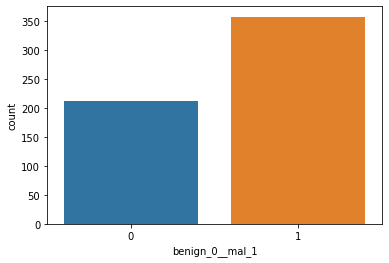

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

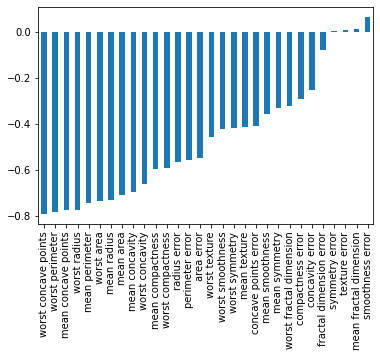

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

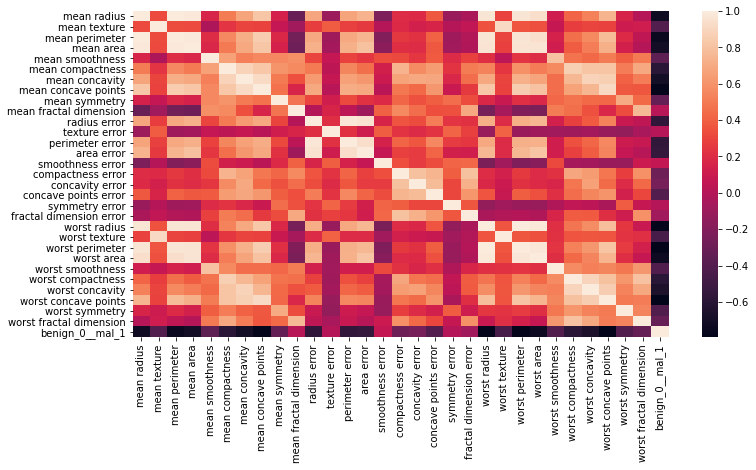

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout 

In [ ]:
X_train.shape 

(426, 30)

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary classsification 
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6655 - val_loss: 0.6475
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6333 - val_loss: 0.6165
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6044 - val_loss: 0.5861
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5721 - val_loss: 0.5515
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5382 - val_loss: 0.5134
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4972 - val_loss: 0.4727
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4568 - val_loss: 0.4304
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4195 - val_loss: 0.3940
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3815 - val_loss: 0.3550
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3496 - val_loss: 0.3264
Epoch 11/

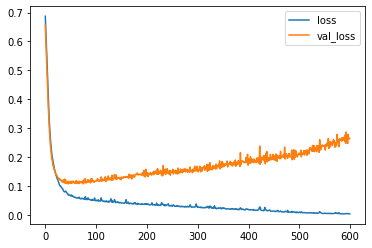

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot( )

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Binary classsification 
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
 from tensorflow.keras.callbacks import EarlyStopping
 early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6846 - val_loss: 0.6712
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6631 - val_loss: 0.6515
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6385 - val_loss: 0.6180
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6013 - val_loss: 0.5781
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.5278
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5024 - val_loss: 0.4675
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4448 - val_loss: 0.4100
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3946 - val_loss: 0.3608
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3491 - val_loss: 0.3194
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3137 - val_loss: 0.2841
Epoch 11/

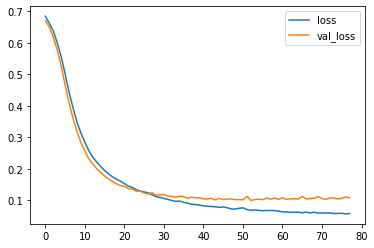

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))


# Binary classsification 
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7216 - val_loss: 0.6825
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6754 - val_loss: 0.6611
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6441
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6471 - val_loss: 0.6258
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6331 - val_loss: 0.6060
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6267 - val_loss: 0.5859
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5908 - val_loss: 0.5637
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5840 - val_loss: 0.5418
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5714 - val_loss: 0.5182
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5488 - val_loss: 0.4942
Epoch 11/

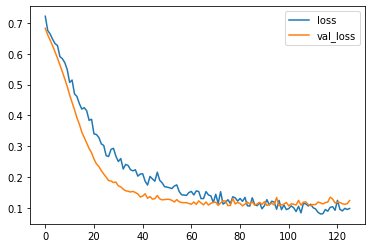

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions  = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]
